In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Membaca dataset
df = pd.read_csv('../../data/day.csv')
print("Dataset Shape:", df.shape)
print("\n5 Data Pertama:")
df.head()

Dataset Shape: (731, 16)

5 Data Pertama:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Tugas Mandiri 3: Regresi Linear pada Dataset Bike Sharing

Dataset ini berisi informasi tentang penyewaan sepeda berdasarkan berbagai faktor seperti cuaca, musim, dan waktu.

## 1. Eksplorasi Data dan Statistik Deskriptif

In [3]:
# Informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\n" + "="*60)
print("Statistik Deskriptif:")
df.describe()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Statistik Deskriptif:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## 2. Analisis Korelasi

Menganalisis korelasi antara variabel untuk menentukan variabel independent (X) yang tepat untuk memprediksi cnt (jumlah penyewaan sepeda)

Korelasi dengan CNT (Target):
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


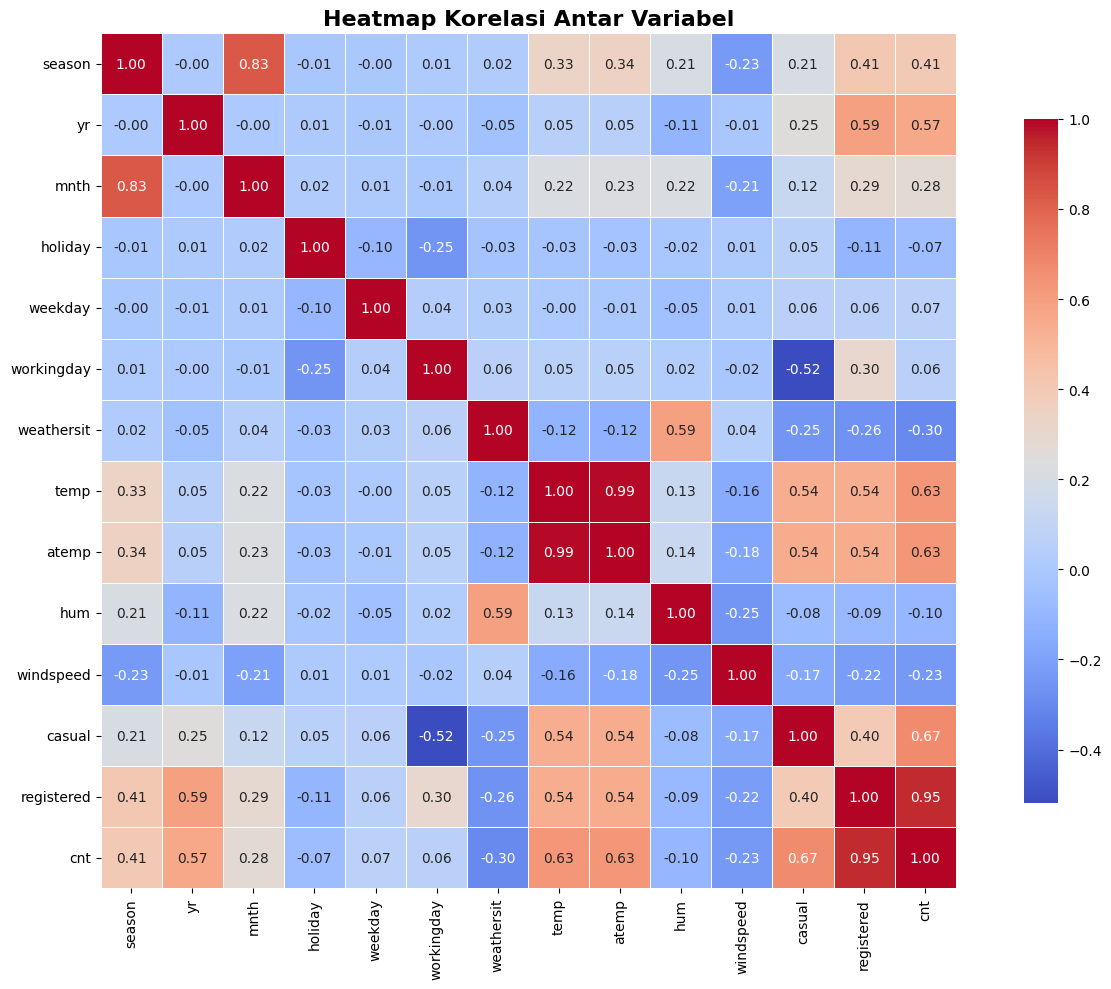

In [4]:
# Pilih kolom numerik untuk analisis korelasi
numeric_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
                'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 
                'registered', 'cnt']

# Hitung korelasi
corr_matrix = df[numeric_cols].corr()

# Tampilkan korelasi dengan cnt (target)
print("Korelasi dengan CNT (Target):")
print(corr_matrix['cnt'].sort_values(ascending=False))

# Visualisasi heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
# REGRESI LINEAR SEDERHANA

Untuk regresi linear sederhana, kita akan menggunakan variabel `temp` (temperatur) sebagai variabel independent (X) karena memiliki korelasi tinggi dengan `cnt`.

## 3. Split Data Training dan Testing (80:20)

In [5]:
# Variabel independent (X) - gunakan temp untuk regresi sederhana
X_simple = df[['temp']]

# Variabel dependent (Y) - target yang ingin diprediksi
y = df['cnt']

# Split data: 80% training, 20% testing
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

print(f"Jumlah data training: {len(X_train_simple)}")
print(f"Jumlah data testing : {len(X_test_simple)}")
print(f"\nContoh data training:")
X_train_simple.head()

Jumlah data training: 584
Jumlah data testing : 147

Contoh data training:


,temp
682,0.343333
250,0.633913
336,0.299167
260,0.507500
543,0.697500


## 4. Pemodelan Regresi Linear Sederhana

In [6]:
# Buat model regresi linear
model_simple = LinearRegression()

# Latih model dengan data training
model_simple.fit(X_train_simple, y_train)

print("Model berhasil dilatih!")
print(f"Koefisien (slope)    : {model_simple.coef_[0]:.2f}")
print(f"Intercept (konstanta): {model_simple.intercept_:.2f}")

Model berhasil dilatih!
Koefisien (slope)    : 6575.39
Intercept (konstanta): 1272.16


## 5. Evaluasi Model Regresi Linear Sederhana

In [7]:
# Prediksi data testing
y_pred_simple = model_simple.predict(X_test_simple)

# Hitung metrik evaluasi
r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print("="*60)
print("EVALUASI MODEL REGRESI LINEAR SEDERHANA")
print("="*60)
print(f"R² Score (Koefisien Determinasi): {r2_simple:.4f} ({r2_simple*100:.2f}%)")
print(f"MAE (Mean Absolute Error)       : {mae_simple:.2f}")
print(f"MSE (Mean Squared Error)        : {mse_simple:.2f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse_simple:.2f}")
print("="*60)

# Persamaan regresi
slope = model_simple.coef_[0]
intercept = model_simple.intercept_
print(f"\nPersamaan Regresi:")
print(f"cnt = {slope:.2f} * temp + {intercept:.2f}")

EVALUASI MODEL REGRESI LINEAR SEDERHANA
R² Score (Koefisien Determinasi): 0.4037 (40.37%)
MAE (Mean Absolute Error)       : 1291.97
MSE (Mean Squared Error)        : 2391051.89
RMSE (Root Mean Squared Error)  : 1546.30

Persamaan Regresi:
cnt = 6575.39 * temp + 1272.16


## 6. Visualisasi Regresi Linear Sederhana

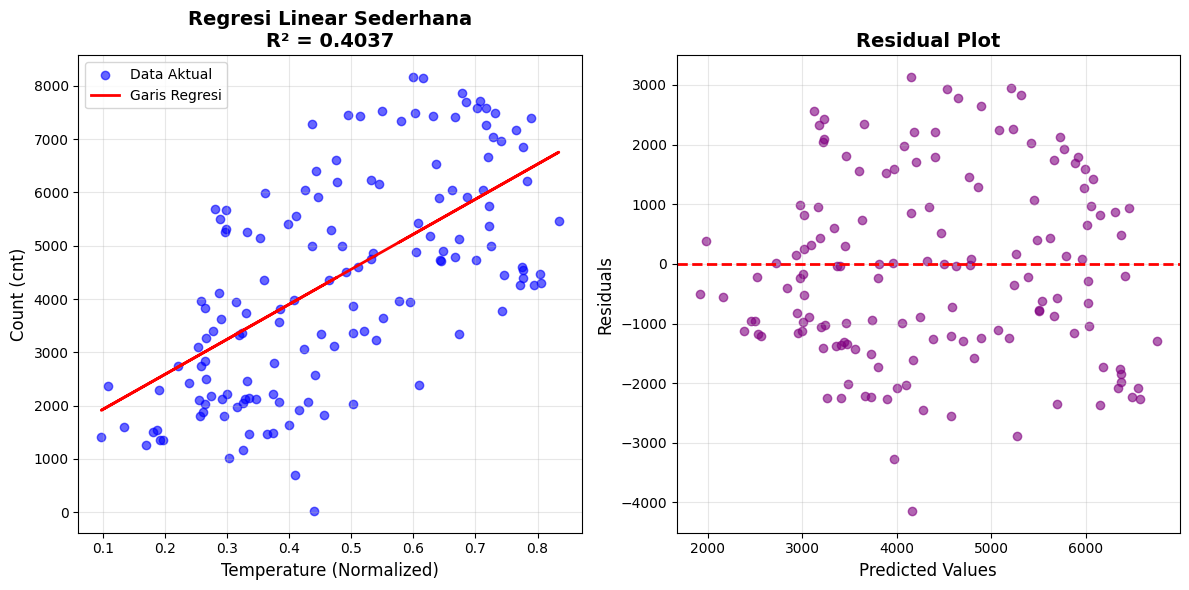

In [8]:
# Plot scatter dan garis regresi
plt.figure(figsize=(12, 6))

# Subplot 1: Data Testing
plt.subplot(1, 2, 1)
plt.scatter(X_test_simple, y_test, color='blue', alpha=0.6, label='Data Aktual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Temperature (Normalized)', fontsize=12)
plt.ylabel('Count (cnt)', fontsize=12)
plt.title(f'Regresi Linear Sederhana\nR² = {r2_simple:.4f}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_simple
plt.scatter(y_pred_simple, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Tabel Hasil Prediksi (Sample)

In [9]:
# Buat tabel hasil prediksi
hasil_simple = pd.DataFrame({
    'Temperature': X_test_simple['temp'].values,
    'Actual_cnt': y_test.values,
    'Predicted_cnt': y_pred_simple,
    'Error': y_test.values - y_pred_simple,
    'Akurasi (%)': (1 - abs(y_test.values - y_pred_simple) / y_test.values) * 100
})

print("Sample Hasil Prediksi (10 data pertama):")
hasil_simple.head(10)

Sample Hasil Prediksi (10 data pertama):


,Temperature,Actual_cnt,Predicted_cnt,Error,Akurasi (%)
0,0.475833,6606,4400.946437,2205.053563,66.620443
1,0.186957,1550,2501.473134,-951.473134,38.614637
2,0.330833,3747,3447.514414,299.485586,92.007324
3,0.425833,6041,4072.176774,1968.823226,67.408985
4,0.550000,7538,4888.623628,2649.376372,64.853060
5,0.716667,7264,5984.524697,1279.475303,82.386078
6,0.134783,1605,2158.408566,-553.408566,65.519715
7,0.373333,2209,3726.968628,-1517.968628,31.282543
8,0.731667,7499,6083.155595,1415.844405,81.119557
9,0.722500,5743,6022.878965,-279.878965,95.126607


---
# REGRESI LINEAR BERGANDA (MULTIPLE LINEAR REGRESSION)

Untuk regresi linear berganda, kita akan menggunakan beberapa variabel independent yang memiliki korelasi signifikan dengan `cnt`. Berdasarkan analisis korelasi, kita akan gunakan: `temp`, `atemp`, `hum`, `windspeed`, `season`, `yr`, `weathersit`, dan `workingday`.

## 8. Split Data untuk Multiple Linear Regression

In [10]:
# Variabel independent (X) - multiple features
X_multiple = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'weathersit', 'workingday']]

# Variabel dependent (Y) tetap sama
# y sudah didefinisikan sebelumnya

# Split data: 80% training, 20% testing
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

print(f"Jumlah data training: {len(X_train_mult)}")
print(f"Jumlah data testing : {len(X_test_mult)}")
print(f"Jumlah fitur        : {X_train_mult.shape[1]}")
print(f"\nContoh data training:")
X_train_mult.head()

Jumlah data training: 584
Jumlah data testing : 147
Jumlah fitur        : 8

Contoh data training:


,temp,atemp,hum,windspeed,season,yr,weathersit,workingday
682,0.343333,0.323225,0.662917,0.342046,4,1,2,1
250,0.633913,0.555361,0.939565,0.192748,3,0,3,1
336,0.299167,0.310604,0.612917,0.095783,4,0,1,0
260,0.507500,0.490537,0.695000,0.178483,3,0,1,0
543,0.697500,0.640792,0.360000,0.271775,3,1,1,1


## 9. Pemodelan Multiple Linear Regression

In [11]:
# Tambahkan konstanta untuk statsmodels
X_train_const = sm.add_constant(X_train_mult)

# Buat model OLS (Ordinary Least Squares)
model_multiple = sm.OLS(y_train_mult, X_train_const).fit()

# Tampilkan summary model
print("="*60)
print("SUMMARY MODEL MULTIPLE LINEAR REGRESSION")
print("="*60)
print(model_multiple.summary())

# Tampilkan koefisien
print("\n" + "="*60)
print("KOEFISIEN MODEL")
print("="*60)
for idx, coef in enumerate(model_multiple.params):
    print(f"{model_multiple.params.index[idx]:15s}: {coef:10.4f}")

SUMMARY MODEL MULTIPLE LINEAR REGRESSION
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     258.4
Date:                Thu, 09 Oct 2025   Prob (F-statistic):          7.54e-185
Time:                        19:15:13   Log-Likelihood:                -4796.8
No. Observations:                 584   AIC:                             9612.
Df Residuals:                     575   BIC:                             9651.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

## 10. Persamaan Regresi Berganda

In [12]:
# Buat persamaan regresi
const = model_multiple.params['const']
params = model_multiple.params.drop('const')

print("PERSAMAAN REGRESI LINEAR BERGANDA:")
print("="*60)
equation = f"cnt = {const:.2f}"
for feature, coef in params.items():
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.2f}*{feature}"
print(equation)
print("="*60)

PERSAMAAN REGRESI LINEAR BERGANDA:
cnt = 1482.16 + 2272.47*temp + 3369.33*atemp - 1058.16*hum - 2107.11*windspeed + 425.18*season + 2013.46*yr - 603.28*weathersit + 211.18*workingday


## 11. Evaluasi Model Multiple Linear Regression dengan Data Testing

In [13]:
# Tambahkan konstanta ke data testing
X_test_const = sm.add_constant(X_test_mult)

# Prediksi menggunakan data testing
y_pred_mult = model_multiple.predict(X_test_const)

# Hitung metrik evaluasi
r2_mult = r2_score(y_test_mult, y_pred_mult)
mae_mult = mean_absolute_error(y_test_mult, y_pred_mult)
mse_mult = mean_squared_error(y_test_mult, y_pred_mult)
rmse_mult = np.sqrt(mse_mult)

print("="*60)
print("EVALUASI MODEL MULTIPLE LINEAR REGRESSION")
print("="*60)
print(f"R² Score (Koefisien Determinasi): {r2_mult:.4f} ({r2_mult*100:.2f}%)")
print(f"MAE (Mean Absolute Error)       : {mae_mult:.2f}")
print(f"MSE (Mean Squared Error)        : {mse_mult:.2f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse_mult:.2f}")
print("="*60)

EVALUASI MODEL MULTIPLE LINEAR REGRESSION
R² Score (Koefisien Determinasi): 0.8183 (81.83%)
MAE (Mean Absolute Error)       : 641.30
MSE (Mean Squared Error)        : 728775.46
RMSE (Root Mean Squared Error)  : 853.68


## 12. Tabel Hasil Prediksi Multiple Regression

In [14]:
# Buat tabel hasil prediksi
hasil_multiple = pd.DataFrame({
    'Actual_cnt': y_test_mult.values,
    'Predicted_cnt': y_pred_mult,
    'Selisih_Error': y_test_mult.values - y_pred_mult,
    'Akurasi (%)': (1 - abs(y_test_mult.values - y_pred_mult) / y_test_mult.values) * 100
})

# Gabungkan dengan fitur untuk analisis lebih detail
hasil_multiple = pd.concat([
    X_test_mult.reset_index(drop=True), 
    hasil_multiple.reset_index(drop=True)
], axis=1)

print("Sample Hasil Prediksi (15 data pertama):")
hasil_multiple.head(15)

Sample Hasil Prediksi (15 data pertama):


,temp,atemp,hum,windspeed,season,yr,weathersit,workingday,Actual_cnt,Predicted_cnt,Selisih_Error,Akurasi (%)
0,0.475833,0.469054,0.733750,0.174129,4,1,1,1,6606,6322.625657,283.374343,95.710349
1,0.186957,0.177878,0.437826,0.277752,1,0,1,1,1550,1490.881215,59.118785,96.185885
2,0.330833,0.318812,0.585833,0.229479,4,0,2,1,3747,2910.050204,836.949796,77.663470
3,0.425833,0.417287,0.676250,0.172267,2,1,2,0,6041,4434.524018,1606.475982,73.407118
4,0.550000,0.544179,0.570000,0.236321,4,1,1,1,7538,6786.518468,751.481532,90.030757
5,0.716667,0.650271,0.633333,0.151733,3,1,1,1,7264,7208.763144,55.236856,99.239581
6,0.134783,0.144283,0.494783,0.188839,1,0,2,1,1605,782.923336,822.076664,48.780270
7,0.373333,0.377513,0.686250,0.274246,1,0,1,1,2209,2331.566798,-122.566798,94.451480
8,0.731667,0.667933,0.485833,0.080850,3,1,2,1,7499,7004.516135,494.483865,93.406003
9,0.722500,0.672992,0.684583,0.295400,2,1,1,1,5743,6516.440349,-773.440349,86.532468


## 13. Visualisasi Perbandingan Actual vs Predicted

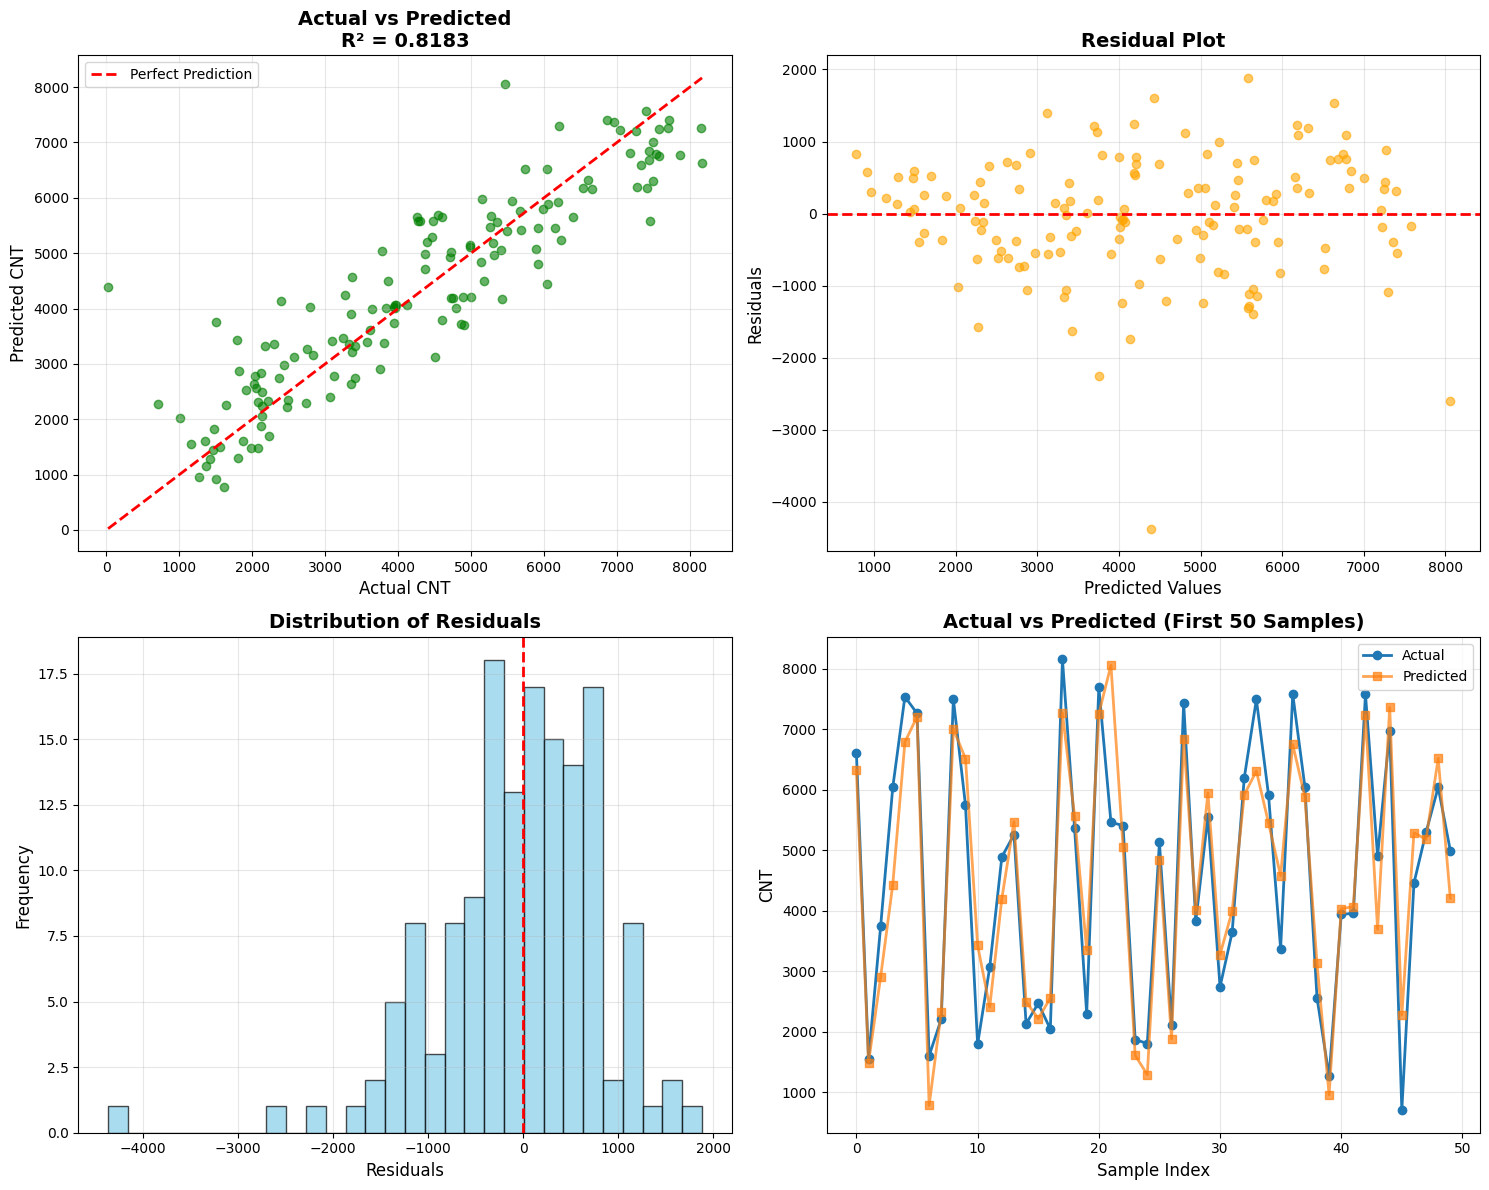

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted (Scatter)
axes[0, 0].scatter(y_test_mult, y_pred_mult, alpha=0.6, color='green')
axes[0, 0].plot([y_test_mult.min(), y_test_mult.max()], 
                [y_test_mult.min(), y_test_mult.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual CNT', fontsize=12)
axes[0, 0].set_ylabel('Predicted CNT', fontsize=12)
axes[0, 0].set_title(f'Actual vs Predicted\nR² = {r2_mult:.4f}', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residual Plot
residuals_mult = y_test_mult - y_pred_mult
axes[0, 1].scatter(y_pred_mult, residuals_mult, alpha=0.6, color='orange')
axes[0, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution of Residuals
axes[1, 0].hist(residuals_mult, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1, 0].axvline(x=0, color='red', linestyle='--', lw=2)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Actual vs Predicted (Line Plot - Sample)
sample_indices = range(min(50, len(y_test_mult)))
axes[1, 1].plot(sample_indices, y_test_mult.values[:len(sample_indices)], 
                marker='o', label='Actual', linewidth=2)
axes[1, 1].plot(sample_indices, y_pred_mult[:len(sample_indices)], 
                marker='s', label='Predicted', linewidth=2, alpha=0.7)
axes[1, 1].set_xlabel('Sample Index', fontsize=12)
axes[1, 1].set_ylabel('CNT', fontsize=12)
axes[1, 1].set_title('Actual vs Predicted (First 50 Samples)', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 14. Perbandingan Model: Simple vs Multiple Regression

In [16]:
# Buat tabel perbandingan
comparison = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'Simple Regression': [r2_simple, mae_simple, mse_simple, rmse_simple],
    'Multiple Regression': [r2_mult, mae_mult, mse_mult, rmse_mult],
    'Improvement': [
        f"+{(r2_mult - r2_simple)*100:.2f}%",
        f"-{((mae_simple - mae_mult)/mae_simple)*100:.2f}%",
        f"-{((mse_simple - mse_mult)/mse_simple)*100:.2f}%",
        f"-{((rmse_simple - rmse_mult)/rmse_simple)*100:.2f}%"
    ]
})

print("="*80)
print("PERBANDINGAN MODEL REGRESI LINEAR SEDERHANA VS BERGANDA")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)
print("\nKESIMPULAN:")
print(f"- Model Multiple Regression memiliki R² lebih tinggi ({r2_mult:.4f} vs {r2_simple:.4f})")
print(f"- Model Multiple Regression memiliki error lebih rendah")
print(f"- Multiple Regression lebih baik untuk memprediksi jumlah penyewaan sepeda")
print("="*80)

PERBANDINGAN MODEL REGRESI LINEAR SEDERHANA VS BERGANDA
  Metric  Simple Regression  Multiple Regression Improvement
R² Score       4.037102e-01             0.818255     +41.45%
     MAE       1.291969e+03           641.296599     -50.36%
     MSE       2.391052e+06        728775.458810     -69.52%
    RMSE       1.546303e+03           853.683465     -44.79%

KESIMPULAN:
- Model Multiple Regression memiliki R² lebih tinggi (0.8183 vs 0.4037)
- Model Multiple Regression memiliki error lebih rendah
- Multiple Regression lebih baik untuk memprediksi jumlah penyewaan sepeda


## 15. Visualisasi Pentingnya Fitur (Feature Importance)

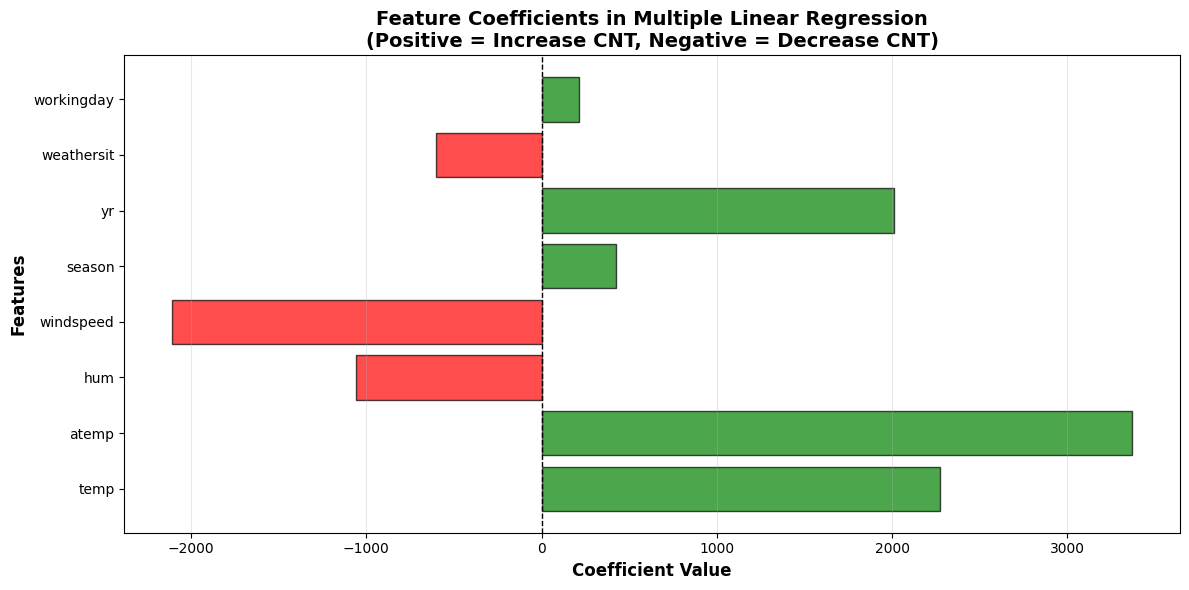

KOEFISIEN FITUR (diurutkan berdasarkan pengaruh):
   Feature  Coefficient
     atemp  3369.331757
      temp  2272.474680
 windspeed -2107.106136
        yr  2013.463141
       hum -1058.163530
weathersit  -603.280392
    season   425.180229
workingday   211.184692


In [17]:
# Ambil koefisien dari model (tanpa konstanta)
coefficients = model_multiple.params.drop('const')
features = coefficients.index

# Buat plot
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients.values]
plt.barh(features, coefficients.values, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Coefficients in Multiple Linear Regression\n(Positive = Increase CNT, Negative = Decrease CNT)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Tampilkan tabel koefisien
print("KOEFISIEN FITUR (diurutkan berdasarkan pengaruh):")
print("="*60)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients.values,
    'Abs_Coefficient': abs(coefficients.values)
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']].to_string(index=False))